# Ex2 - Método Bisseccao - Ismael Marinho

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Questão 1

### Criando a função da Bissecção

In [2]:
def bisseccao(f, a, b, it = -1, r = 0,e = 1e-20):
    x = 0
    x_prev = a
    err = 1
    i = 0
    
    if np.sign(f(a)) * np.sign(f(b)) != -1:
            return False
    
    while err > e:
        
        if it != -1:
            if it == i:
                break
        
        x = (a + b) / 2
        if f(x) == r:
            return x
        elif np.sign(f(a)) * np.sign(f(x)) == -1:
            b = x
        else:
            a = x   
        err = np.abs((x - x_prev) / x)
        x_prev = x
        i += 1
    return x


A função recebe 4 parâmetros, sendo eles a função(f), o intervalo(a, b) e a tolerancia(e).

A ideia da função é ir reduzindo o intervalo até encontrar a raiz. Então a cada iteração o intervalo é partido ao meio e verifica-se se "x" é a raiz, ou se entre "x" e "a" ainda possui uma raiz, senão "a" será igual ao "x", já que entre eles há uma raiz. E assim se repete até encontrar a raiz ou a taxa de erro ser menor que 1e-10.

### Teste

In [3]:
f = lambda x: x**2 + 5*x + 3

print(bisseccao(f, -2, 1))
print(bisseccao(f, 1, -2))

-0.6972243622680054
-0.6972243622680054


Nesse caso ele inclusive saiu do loop quando o erro foi menor 1e-10, pois o número de interações para encontrar a raiz seria muito grande ou impossível(ficaria calculando infinitamente).

## Questão 2

####  Determine as raízes reais de f (x) = −0.5$x^2$ + 2.5x + 4.5:

#### (a) Graficamente.

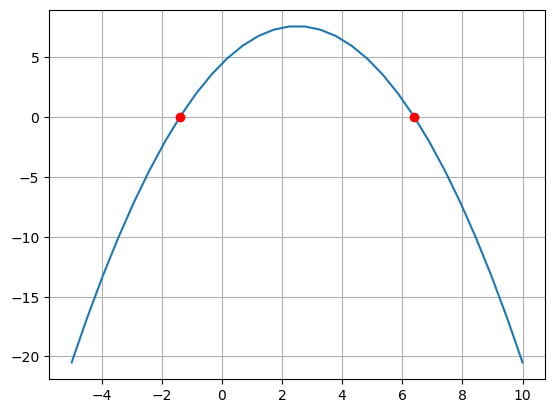

In [4]:
f = lambda x: -0.5*x**2 + 2.5*x + 4.5

x = np.linspace(-5, 10, 30)  

plt.grid()
plt.plot(x, f(x), [bisseccao(f, -1, -3), bisseccao(f, 6, 7)], [0,0], 'ro')  

#### (b) Usando a fórmula quadrática.

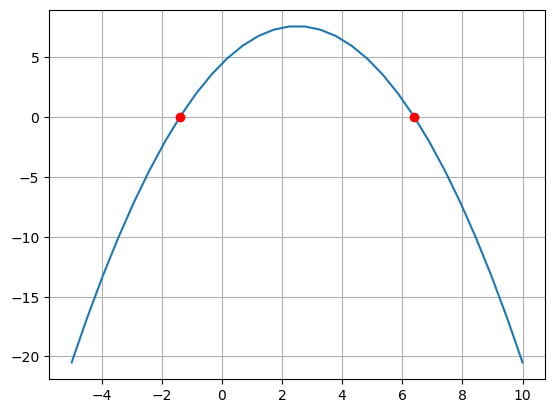

In [5]:
x = np.linspace(-5, 10, 30)  

raizes = np.roots([-0.5, 2.5, 4.5])
plt.grid()
plt.plot(x, f(x), raizes, [0,0], 'ro')  

#### (c) Usando três iterações do método da bisseção para determinar a maior raiz. Use as aproximações iniciais xl = 5 e xu = 10. 

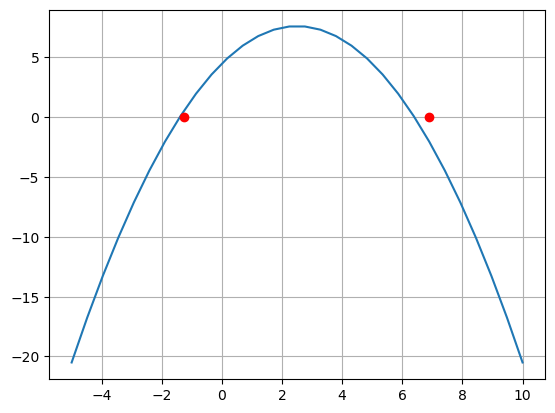

In [6]:
x = np.linspace(-5, 10, 30)  

plt.grid()
plt.plot(x, f(x), [bisseccao(f, -1, -3, 3), bisseccao(f, 5, 10, 3)], [0, 0], 'ro')

#### Calcule o erro relativo obtido entre cada iteração, e o erro entre os valores verdadeiros encontrados no item b e o valor de cada iteração.

In [7]:
for i in range(1, 5, 1):
    print(f"Iteracao {i}")
    print("Porcentagem raiz positiva: {} %".format(np.abs((bisseccao(f, 5, 10, i) - bisseccao(f, 5, 10))/bisseccao(f, 5, 10)) * 100))
    print()

Iteracao 1
Porcentagem raiz positiva: 17.093736496110605 %

Iteracao 2
Porcentagem raiz positiva: 2.421886253241164 %

Iteracao 3
Porcentagem raiz positiva: 7.33592512143472 %

Iteracao 4
Porcentagem raiz positiva: 2.4570194340967784 %



In [8]:
for i in range(1, 5, 1):
    print(f"Iteracao {i}")
    print("Porcentagem raiz positiva: {} %".format( np.abs((bisseccao(f, 5, 10, i) - raizes[0])/raizes[0]) * 100))
    print()

Iteracao 1
Porcentagem raiz positiva: 17.093736496110605 %

Iteracao 2
Porcentagem raiz positiva: 2.421886253241164 %

Iteracao 3
Porcentagem raiz positiva: 7.33592512143472 %

Iteracao 4
Porcentagem raiz positiva: 2.4570194340967784 %



## Questão 3

Localize a primeira raiz não-trivial de $sin x = x^3$, onde x está em radianos. Use uma técnica gráfica e a bisseção com o intervalo inicial de 0, 5 a 1. Faça os cálculos até que o erro seja inferior a 2%.

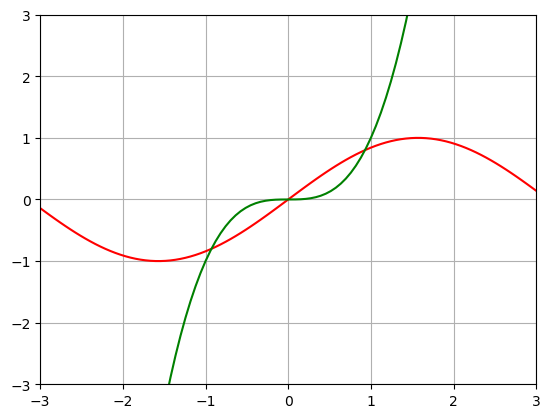

In [9]:
x = np.linspace(-3, 3, 100)  

sin_x = lambda x: np.sin(x)
x_3 = lambda x: x**3

ax = plt.gca()
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

plt.grid()
plt.plot(x, sin_x(x), color='r', label='sin')
plt.plot(x, x_3(x), color='g', label='x^3')

plt.show()


In [26]:
inter = lambda x: np.sin(x) - x**3

intersecao = bisseccao(inter, 0.5, 1)

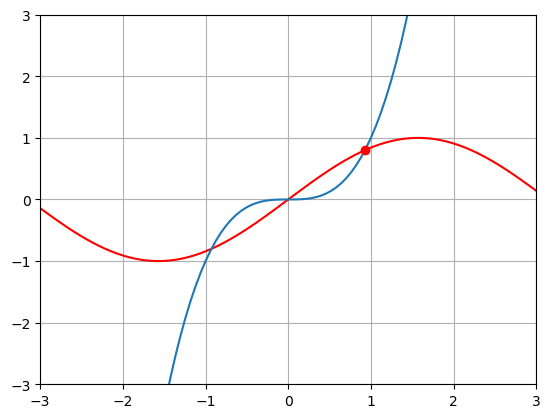

In [32]:
x = np.linspace(-3, 3, 100)  

sin_x = lambda x: np.sin(x)
x_3 = lambda x: x**3

ax = plt.gca()
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

plt.grid()
plt.plot(x, sin_x(x), color='r')
plt.plot(x, x_3(x),[intersecao], [x_3(intersecao)], 'ro')

plt.show()


## Questão 4

Dada $f(x) = −2x^6 − 1.5x^4 + 10x + 20$, encontre o máximo dessa função ( f'(x) = 0) usando o método da bisseção, considerando o intervalo [0, 1] e um erro limite de 5%.

In [11]:
f = np.poly1d([-2, 0, -1.5, 0, 0, 10, 20])

derivada = f.deriv()

print(f"valor encontrado no método da bisseccao {bisseccao(derivada, 0, 1)}")
print(f"valor encontrado como método numpy {np.roots(derivada).max()}")
print("Erro relativo: {} %".format(np.abs((bisseccao(derivada, 0, 1) - np.roots(derivada).max())/np.roots(derivada).max()) * 100))

valor encontrado no método da bisseccao 0.8714113505667633
valor encontrado como método numpy (0.8714113505667631+0j)
Erro relativo: 2.5481031981120535e-14 %


## Questão 5

In [12]:
def interpolacao_linear(f, a, b, it = -1, r = 0,e = 1e-20):
    x = 0
    x_prev = a
    err = 1
    i = 0
    
    if np.sign(f(a)) * np.sign(f(b)) != -1:
            return False
    
    while err > e:
        
        if it != -1:
            if it == i:
                break
        
        x = b - (f(b) * (a - b))/(f(a) - f(b))
        if f(x) == r:
            return x
        elif np.sign(f(a)) * np.sign(f(x)) == -1:
            b = x
        else:
            a = x   
        err = np.abs((x - x_prev) / x)
        x_prev = x
        i += 1
    return x

### Teste Básico

In [13]:

f = np.poly1d([1, 5, 3])

print(interpolacao_linear(f, -2, 1))
print(bisseccao(f, -2, 1))

print(np.roots(f)[1])

-0.6972243622680057
-0.6972243622680053
-0.6972243622680053


### Casos do exercicio

#### Raiz, do exercicio 2

In [14]:
f = np.poly1d([-0.5, 2.5, 4.5])

print(interpolacao_linear(f, 5, 10))
print(bisseccao(f, 5, 10))

print(np.roots(f)[0])

6.405124837953327
6.405124837953327
6.405124837953327


In [15]:
for i in range(1, 5, 1):
    print(f"Iteracao {i}")
    print("Porcentagem bisseccao: {} %".format( np.abs((bisseccao(f, 5, 10, i) - raizes[0])/raizes[0]) * 100))
    print("Porcentagem interpolacao: {} %".format( np.abs((interpolacao_linear(f, 5, 10, i) - raizes[0])/raizes[0]) * 100))
    print()

Iteracao 1
Porcentagem bisseccao: 17.093736496110605 %
Porcentagem interpolacao: 7.886260623059653 %

Iteracao 2
Porcentagem bisseccao: 2.421886253241164 %
Porcentagem interpolacao: 2.6009286637856768 %

Iteracao 3
Porcentagem bisseccao: 7.33592512143472 %
Porcentagem interpolacao: 0.8319604161919305 %

Iteracao 4
Porcentagem bisseccao: 2.4570194340967784 %
Porcentagem interpolacao: 0.2634634293879219 %



#### Maximo, exercicio 4

In [16]:
f = np.poly1d([-2, 0, -1.5, 0, 0, 10, 20])

derivada = f.deriv()

print(f"valor encontrado no método da bisseccao {bisseccao(derivada, 0, 1)}")
print(f"valor encontrado no método da interpolacao {interpolacao_linear(derivada, 0, 1)}")
print(f"valor encontrado como método numpy {np.roots(derivada).max()}")
print("Erro relativo bisseccao: {} %".format(np.abs((bisseccao(derivada, 0, 1) - np.roots(derivada).max())/np.roots(derivada).max()) * 100))
print("Erro relativo interpolacao: {} %".format(np.abs((interpolacao_linear(derivada, 0, 1) - np.roots(derivada).max())/np.roots(derivada).max()) * 100))


valor encontrado no método da bisseccao 0.8714113505667633
valor encontrado no método da interpolacao 0.8714113505667633
valor encontrado como método numpy (0.8714113505667631+0j)
Erro relativo bisseccao: 2.5481031981120535e-14 %
Erro relativo interpolacao: 2.5481031981120535e-14 %


Os dois métodos de assemelharam bastante nos resultados, porém com duas observações. A primeira é que o método da interpolação conseguiu ter um erro relativo muito menor em poucas iterações, ou seja, ele chega mais próximo ao resultado gastando menos processamento, o segundo é que no primeiro caso testado o método da interpolação teve o resultado semelhante ao np.roots do numpy, o que é na minha opinião bem interessante.